<a href="https://colab.research.google.com/github/NithishC/ColabNotebook/blob/master/road_lane_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [0]:
image = mpimg.imread('test.jpg')

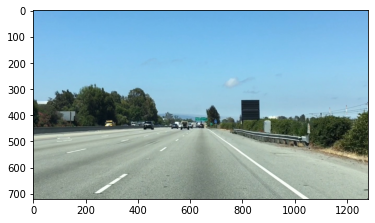

In [3]:
plt.imshow(image)

In [0]:
y = image.shape[0]
x = image.shape[1]
color_copy= np.copy(image)
region_copy = np.copy(image)

In [0]:
red = 235
green = 235
blue = 235
rgb_threshold = [red, green, blue]

In [0]:
left_bottom = [200,700]
right_bottom = [1020,700]
apex = [625, 380]

In [0]:
left_line = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
right_line = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
bottom_line = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [0]:
color_threshold = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

In [0]:
XX, YY = np.meshgrid(np.arange(0, x), np.arange(0, y))
region_threshold = (YY > (XX*left_line[0] + left_line[1])) & \
                    (YY > (XX*right_line[0] + right_line[1])) & \
                    (YY < (XX*bottom_line[0] + bottom_line[1]))

In [0]:
color_copy[color_threshold] = [0,0,0]
region_copy[~color_threshold & region_threshold] = [0,0,0]

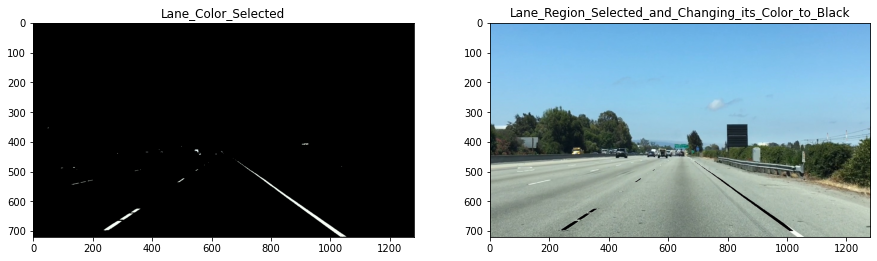

In [12]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title("Lane_Color_Selected")
plt.imshow(color_copy)
plt.subplot(1,2,2)
plt.title("Lane_Region_Selected_and_Changing_its_Color_to_Black")
plt.imshow(region_copy)